In [80]:
import pandas as pd
import numpy as np
import codecs
import re
from cleanco import cleanco
from fuzzywuzzy import fuzz

In [81]:
INPUT_HOME = 'D:/Codeshield/data'
OUTPUT_HOME = 'D:/Codeshield/output'

In [82]:
validation = pd.read_csv(OUTPUT_HOME+'/whole_validation.csv',index_col=0)
validation[:5]

,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,bank_operation_code,...,ordering_customer,ordering_institution,original_ordered_amount,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference
0,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,/XXXXXXXXXXX\r\n\r\nCANVAS BEAUTY INTERNATIONA...,XXXXXXXXXXX,500.0,SGD,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX
1,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,CRED,...,/XXXXXXXXXXX\r\n\r\nSMC INDUSTRIAL PTE LTD\r\n...,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX
2,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,/XXXXXXXXXXX\r\n\r\nNG CHENG HUA\r\n\r\nS1632268G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX
3,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,/XXXXXXXXXXX\r\n\r\nVISHAL BIPIN DOSHI\r\n\r\n...,SAXO CAPITAL MARKETS PTE. LTD.\r\n\r\n3 CHURCH...,500.0,SGD,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX
4,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,/XXXXXXXXXXX HSBC 001-235902-130\r\n\r\nD+L PO...,XXXXXXXXXXX,500.0,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nREF. INV. NO. SINV1780490 D...,XXXXXXXXXXX,XXXXXXX,XXXXXXXXXXX


In [3]:
train = pd.read_csv(OUTPUT_HOME+'\whole_train.csv',index_col=0)
train1 = pd.read_csv(OUTPUT_HOME+'\whole_train_new.csv',index_col=0)
train1['score'] = train1['score'].astype('str')
train = pd.concat([train,train1],axis=0).reset_index(drop=True)
train[:5]

C:\Users\yasar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,ordering_customer,ordering_institution,original_ordered_amount,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference
0,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nALLIANZ WORLDWIDE CARE SA ...,XXXXXXXXXXX\r\n\r\nCITIIE2XXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX,XXXXXXXXXXX
1,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nREEBONZ LIMITED\r\n\r\n5 T...,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX
2,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nQK MARINE SERVICES PVT LTD...,NaN,500.0,SGD,NaN,NaN,XXXXXXXXXXX\r\n\r\nLRN NO 201606103,NaN,NaN,XXXXXXXXXXX
3,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nAGODA COMPANY PTE LTD\r\n\...,XXXXXXXXXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\n94657\r\n\r\nAF946572017051...,NaN,NaN,XXXXXXXXXXX
4,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nKNOWLES ELECTRONICS (SUZHO...,XXXXXXXXXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX


In [4]:
test = pd.read_csv(OUTPUT_HOME+'\whole_test.csv',index_col=0)
test1 = pd.read_csv(OUTPUT_HOME+'\whole_test_new.csv',index_col=0)
test1['score'] = train1['score'].astype('str')
test = pd.concat([test,test1],axis=0).reset_index(drop=True)
test[:5]

,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,ordering_customer,ordering_institution,original_ordered_amount,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference
0,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nALLIANZ WORLDWIDE CARE SA ...,XXXXXXXXXXX\r\n\r\nCITIIE2XXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX,XXXXXXXXXXX
1,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nREEBONZ LIMITED\r\n\r\n5 T...,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX
2,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nQK MARINE SERVICES PVT LTD...,NaN,500.0,SGD,NaN,NaN,XXXXXXXXXXX\r\n\r\nLRN NO 201606103,NaN,NaN,XXXXXXXXXXX
3,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nAGODA COMPANY PTE LTD\r\n\...,XXXXXXXXXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\n94657\r\n\r\nAF946572017051...,NaN,NaN,XXXXXXXXXXX
4,PASS,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,/XXXXXXXXXXX\r\n\r\nKNOWLES ELECTRONICS (SUZHO...,XXXXXXXXXXX,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX


In [92]:
df_person = pd.DataFrame()
df_org = pd.DataFrame()
watch_list = INPUT_HOME+'/P2/WatchListEntries.csv'


def entity_parse():
    with codecs.open(watch_list, 'r', encoding='utf-16') as f:
        lines = f.read().splitlines()
        lines = list(map(lambda x: x.split('|'), lines))
        person_lines = [i for i in lines if i[0] == 'PERSON']
        # print(person_lines)
        org_lines = [i for i in lines if i[0] == 'ORGANIZATION']
        cols = ['ENTRY_TYPE', 'ENTRY_FIRST_NAME', 'ENTRY_MIDDLE_NAME', 'ENTRY_LAST_NAME', 'ENTRY_FULL_NAME', 'DECEASED', \
               'DECEASED_DATE', 'GENDER', 'ID_SET', 'NATIONALITY_COUNTRY_SET', 'DATE_OF_BIRTH_SET', 'PLACE_OF_BIRTH_SET', 'CATEGORY_SET', 'ALIAS_SET', 'ADDRESS_SET', 'CITIZENSHIP', 'AGE']
        df_person = pd.DataFrame(person_lines, columns=cols)
        df_org = pd.DataFrame(org_lines, columns=cols)
        print(df_person.shape)
        print(df_org.shape)
        return df_person, df_org


def clean_beneficiary(x):
    return re.sub('[\n\r]+', ' ', re.sub('/[X]*[\n\r]*', '', x))

train['clean_beneficiary'] = train['beneficiary'].apply(lambda x: clean_beneficiary(str(x)))
test['clean_beneficiary'] = test['beneficiary'].apply(lambda x: clean_beneficiary(str(x)))


def get_score(check, word_dict):
    try:
        check = check.split()
        check = [i for i in check if len(i) > 4]
        if len(check) >= 4:
            check = check[:4]
        score = []
        for w in check:
            try:
                for i in word_dict[w[0]]:
                    aa = fuzz.token_sort_ratio(w, i)
                    score.append(aa)
                    if aa > 60:
                        break
                    # score.append(max([fuzz.token_sort_ratio(w, i) for i in word_dict[w[0]]]))
            except:
                score.append(0)
                continue
        return np.mean(score)
    except:
        return 0


def main(train_df):
    df_person, df_org = entity_parse()
    xx = list(df_person.ENTRY_FULL_NAME.unique())
    yy = list(df_org.ENTRY_FULL_NAME.unique())
    tokens = []
    for i in xx:
        dd = i.split()
        for d in dd:
            tokens.append(d)
    tokens = list(set(tokens))
    final_tokens = [i for i in tokens if len(i) > 4]

    o_tokens = []
    for i in yy:
        dd = i.split()
        for d in dd:
            o_tokens.append(d)
    o_tokens = list(set(o_tokens))
    o_final_tokens = [i for i in o_tokens if len(i) > 4]

    word_dict = {}
    final_tokens = [i.lower() for i in final_tokens]

    o_word_dict = {}
    o_final_tokens = [i.lower() for i in o_final_tokens]

    final_tokens = [re.sub('[^a-z]', '', i) for i in final_tokens]
    o_final_tokens = [re.sub('[^a-z]', '', i) for i in o_final_tokens]
    for i in final_tokens:
        if i:
            try:
                word_dict[i[0]].append(i)
            except:
                word_dict[i[0]] = [i]
    for i in o_final_tokens:
        if i:
            try:
                o_word_dict[i[0]].append(i)
            except:
                o_word_dict[i[0]] = [i]
    # train_df = pd.read_csv('/Users/aditya1/Downloads/DIAFTE-master 2/updated_test.csv')
    train_df.clean_beneficiary = train_df.clean_beneficiary.apply(lambda x: str(x).lower())
#     train_df = train_df[train_df.AlertStatus != 'PASS']
    train_df['pscore'] = train_df.clean_beneficiary.apply(lambda x: get_score(x, word_dict))
    train_df['oscore'] = train_df.clean_beneficiary.apply(lambda x: get_score(x, o_word_dict))
    return train_df


In [10]:
train = main(train)
train[:5]

(164277, 17)
(76915, 17)


C:\Users\yasar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary,pscore,oscore
48757,False Hit,100,43070.05763888889,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\nLOAN N 3 2016,NaN,XXXXXXX\r\n\r\n///CHPREF/0344464,XXXXXXXXXXX,printing solutions limited,30.637066,33.710526
48758,False Hit,100,23/01/2017 15:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...","DBS\r\n\r\n301 UPPER THOMSON RD., 01-45\r\n\r\...",DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX,XXXXXXXXXXX,NaN,XXXXXXXXXXX,"sanyu electric pte. ltd. block 4010, ang mo ki...",35.750000,31.904110
48759,False Hit,88,43010.40833333333,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX\r\n\r\nBNY CUST RRN - F9S170209934...,NaN,XXXXXXX,XXXXXXXXXXX,1triz ventures pte ltd 230 cecil street 19 08 ...,29.034296,31.905983
48760,False Hit,87,43040.45694444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX,XXXXXXXXXXX,mohamed yunos bin abdullah blk 2 07 194 ...,13.750000,14.972059
48761,False Hit,100,13/02/2017 10:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nNO 03 06,NaN,NaN,XXXXXXXXXXX,dhampur international pte ltd,31.872000,32.189024


In [83]:
validation['clean_beneficiary']=validation['beneficiary'].apply(lambda x: clean_beneficiary(str(x)))
validation[:5]

,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,bank_operation_code,...,ordering_institution,original_ordered_amount,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary
0,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,XXXXXXXXXXX,500.0,SGD,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,PR COMMUNICATIONS PTE LTD
1,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,CRED,...,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,"THAI DD RECYCLE CO.,LTD . ."
2,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NG CHENG HUA
3,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,SAXO CAPITAL MARKETS PTE. LTD.\r\n\r\n3 CHURCH...,500.0,SGD,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,VISHAL BIPIN DOSHI WINDY HEIGHTS 82 JALAN DAUD...
4,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,CRED,...,XXXXXXXXXXX,500.0,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nREF. INV. NO. SINV1780490 D...,XXXXXXXXXXX,XXXXXXX,XXXXXXXXXXX,PETER CREMER (S) GMBH 19 KEPPEL ROAD NO. 11-01...


In [84]:
validation = validation.reset_index()
validation[:5]

,index,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,ordering_institution,original_ordered_amount,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary
0,0,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,XXXXXXXXXXX,500.0,SGD,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,PR COMMUNICATIONS PTE LTD
1,1,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,"THAI DD RECYCLE CO.,LTD . ."
2,2,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,NG CHENG HUA
3,3,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SAXO CAPITAL MARKETS PTE. LTD.\r\n\r\n3 CHURCH...,500.0,SGD,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,VISHAL BIPIN DOSHI WINDY HEIGHTS 82 JALAN DAUD...
4,4,N.A,N.A,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,XXXXXXXXXXX,500.0,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nREF. INV. NO. SINV1780490 D...,XXXXXXXXXXX,XXXXXXX,XXXXXXXXXXX,PETER CREMER (S) GMBH 19 KEPPEL ROAD NO. 11-01...


In [86]:
all_pass = validation[validation['score']=='N.A'][['index']]
all_pass['AlertStatus'] = 'PASS'
all_pass[:5]

,index,AlertStatus
0,0,PASS
1,1,PASS
2,2,PASS
3,3,PASS
4,4,PASS


In [11]:
test = main(test)
test[:5]

(164277, 17)
(76915, 17)


C:\Users\yasar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary,pscore,oscore
20395,False Hit,100,43070.05763888889,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\nLOAN N 3 2016,NaN,XXXXXXX\r\n\r\n///CHPREF/0344464,XXXXXXXXXXX,printing solutions limited,30.637066,33.710526
20396,False Hit,100,23/01/2017 15:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...","DBS\r\n\r\n301 UPPER THOMSON RD., 01-45\r\n\r\...",DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX,XXXXXXXXXXX,NaN,XXXXXXXXXXX,"sanyu electric pte. ltd. block 4010, ang mo ki...",35.750000,31.904110
20397,False Hit,88,43010.40833333333,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX\r\n\r\nBNY CUST RRN - F9S170209934...,NaN,XXXXXXX,XXXXXXXXXXX,1triz ventures pte ltd 230 cecil street 19 08 ...,29.034296,31.905983
20398,False Hit,87,43040.45694444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX,XXXXXXXXXXX,mohamed yunos bin abdullah blk 2 07 194 ...,13.750000,14.972059
20399,False Hit,100,13/02/2017 10:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nNO 03 06,NaN,NaN,XXXXXXXXXXX,dhampur international pte ltd,31.872000,32.189024


In [12]:
from collections import Counter

In [13]:
Counter(train['AlertStatus']), train.shape

(Counter({'False Hit': 17137, 'Blocked': 805}), (17942, 35))

In [14]:
Counter(test['AlertStatus']), test.shape

(Counter({'False Hit': 11710, 'Blocked': 513}), (12223, 35))

In [15]:
all_falses = train[train['AlertStatus']=='Blocked']
all_falses

,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary,pscore,oscore
65894,Blocked,100,42795.64513888889,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",HONG LEONG BANK BERHAD\r\n\r\nMALAYSIA,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,f and b nutrition sdn. bhd. . .,33.944000,33.321429
65895,Blocked,86,43010.56597222222,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,kajal kamal fabiani,35.294444,36.712919
65896,Blocked,100,42889.40694444445,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n///BOOK/6095493065JS,XXXXXXXXXXX,shah moqbul huda jewel,29.083333,28.872449
65897,Blocked,100,42797.74097222222,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n//YOUR ACCOUNT WITH US,XXXXXXXXXXX,han myanmar co ltd . . .,34.694444,35.367647
65898,Blocked,100,43070.48819444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\nINSTRUCTION,NaN,XXXXXXX\r\n\r\n//USD ACCOUNT WITH US.,XXXXXXXXXXX,forest products joint venture corporation limi...,32.225989,34.482517
65899,Blocked,100,42797.89375,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,ashok kumar dbs asia central mbfc tower 3 mari...,31.320755,36.764706
65900,Blocked,100,13/02/2017 18:28,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,XXXXXXX,XXXXXXXXXXX,samtec asia pacific pte ltd 1 kallang sector 0...,31.467456,30.595556
65901,Blocked,100,43070.52569444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\n1-1/1244 (UNDER DBS'S SBLC\...,NaN,NaN,XXXXXXXXXXX,joint stock company ''independent petroleum co...,28.866473,28.932246
65902,Blocked,87,22/02/2017 12:49,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n//CO PTE LTD IS NOT AN INDIVIDU...,XXXXXXXXXXX,rainbow exports ceylon . .,26.975791,33.470852
65903,Blocked,100,42979.49791666667,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,chevron u.s.a inc. (singapore br),18.924051,20.937343


In [16]:
all_falses = all_falses.append(test[test['AlertStatus']=='Blocked'])
all_falses

,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary,pscore,oscore
65894,Blocked,100,42795.64513888889,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",HONG LEONG BANK BERHAD\r\n\r\nMALAYSIA,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,f and b nutrition sdn. bhd. . .,33.944000,33.321429
65895,Blocked,86,43010.56597222222,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,NaN,NaN,NaN,XXXXXXXXXXX,kajal kamal fabiani,35.294444,36.712919
65896,Blocked,100,42889.40694444445,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n///BOOK/6095493065JS,XXXXXXXXXXX,shah moqbul huda jewel,29.083333,28.872449
65897,Blocked,100,42797.74097222222,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n//YOUR ACCOUNT WITH US,XXXXXXXXXXX,han myanmar co ltd . . .,34.694444,35.367647
65898,Blocked,100,43070.48819444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\nINSTRUCTION,NaN,XXXXXXX\r\n\r\n//USD ACCOUNT WITH US.,XXXXXXXXXXX,forest products joint venture corporation limi...,32.225989,34.482517
65899,Blocked,100,42797.89375,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,ashok kumar dbs asia central mbfc tower 3 mari...,31.320755,36.764706
65900,Blocked,100,13/02/2017 18:28,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,XXXXXXX,XXXXXXXXXXX,samtec asia pacific pte ltd 1 kallang sector 0...,31.467456,30.595556
65901,Blocked,100,43070.52569444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\n1-1/1244 (UNDER DBS'S SBLC\...,NaN,NaN,XXXXXXXXXXX,joint stock company ''independent petroleum co...,28.866473,28.932246
65902,Blocked,87,22/02/2017 12:49,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX\r\n\r\n//CO PTE LTD IS NOT AN INDIVIDU...,XXXXXXXXXXX,rainbow exports ceylon . .,26.975791,33.470852
65903,Blocked,100,42979.49791666667,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX,NaN,NaN,XXXXXXXXXXX,chevron u.s.a inc. (singapore br),18.924051,20.937343


In [17]:
all_data = pd.concat([train,test],axis=0)
all_data[:5]

,AlertStatus,score,alert_date,Message Text,account_with_institution,application_bank_code,application_branch_code,application_country_bank_code,application_country_code,application_location_code,...,original_ordered_currency,receiver_correspondent,regulatory_reporting,remittance_information,sender_correspondent,sender_to_receiver_information,transaction_reference,clean_beneficiary,pscore,oscore
48757,False Hit,100,43070.05763888889,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,NaN,NaN,NaN,XXXXXXXXXXX\r\n\r\nLOAN N 3 2016,NaN,XXXXXXX\r\n\r\n///CHPREF/0344464,XXXXXXXXXXX,printing solutions limited,30.637066,33.710526
48758,False Hit,100,23/01/2017 15:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...","DBS\r\n\r\n301 UPPER THOMSON RD., 01-45\r\n\r\...",DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX,XXXXXXXXXXX,NaN,XXXXXXXXXXX,"sanyu electric pte. ltd. block 4010, ang mo ki...",35.750000,31.904110
48759,False Hit,88,43010.40833333333,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX\r\n\r\nBNY CUST RRN - F9S170209934...,NaN,XXXXXXX,XXXXXXXXXXX,1triz ventures pte ltd 230 cecil street 19 08 ...,29.034296,31.905983
48760,False Hit,87,43040.45694444444,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",XXXXXXXXXXX,DBSS,XXX,NaN,SG,SG,...,SGD,NaN,NaN,XXXXXXXXXXX,NaN,XXXXXXX,XXXXXXXXXXX,mohamed yunos bin abdullah blk 2 07 194 ...,13.750000,14.972059
48761,False Hit,100,13/02/2017 10:32,"{'basic_bank_code': 'DBSS', 'basic_branch_code...",NaN,DBSS,XXX,NaN,SG,SG,...,SGD,XXXXXXXXXXX,NaN,XXXXXXXXXXX\r\n\r\nNO 03 06,NaN,NaN,XXXXXXXXXXX,dhampur international pte ltd,31.872000,32.189024


In [18]:
Counter(all_falses['account_with_institution'])

Counter({'HONG LEONG BANK BERHAD\r\n\r\nMALAYSIA': 7,
         'XXXXXXXXXXX': 324,
         nan: 946,
         'POSBANK\r\n\r\nSINGAPORE': 4,
         'CO-OPERATIVE BANK LIMITED (PUBLIC\r\n\r\nCB BANK\r\n\r\n11142 YANGON\r\n\r\nMYANMAR': 2,
         'XXXXXXXXXXX DA 04 95665\r\n\r\nMFTBMMMY': 2,
         'XXXXXXXXXXX\r\n\r\nDBSSSGSGXXX': 7,
         'PNB PARIBAS , 10 COLLYER QUAY ,\r\n\r\nOCEAN FINANCIAL CENTRE, SINGAPORE,\r\n\r\n049315    PNBASGSG': 2,
         'MYANMA FOREIGN TRADE BANK\r\n\r\nMYANMAR': 4,
         '/084-004\r\n\r\nNATIONAL AUSTRALIA BANK LTD\r\n\r\nAUSTRALIA': 2,
         '/20 96 89\r\n\r\nBARCLAYS BANK,\r\n\r\nPO BOX 850,\r\n\r\n8 ALEXANDER ROAD, WIMBLEDON,\r\n\r\nLONDON SW19 7LA': 2,
         'UNION BANK\r\n\r\n70 SOUTH LAKE AVENUE PASADENA\r\n\r\n91101. FW122000496': 3,
         'DBS BANK LTD\r\n\r\nSOUTH BRIDGE BRANCH\r\n\r\nSWIFT CODE:DBSSSGSG SINGAPORE': 2,
         'XXXXXXXXXXX 083510\r\n\r\nNATAAU3303M': 2,
         'DBSSSGSG\r\n\r\nDBS BANK LIMITED\r\n\r\n6 

In [19]:
Counter(all_data['account_with_institution'].str.contains('BARCLAYS BANK'))

Counter({nan: 19860, False: 10297, True: 8})

In [20]:
for i in all_falses.columns[4:]:
    uniques = Counter(all_falses[i])
    if len(uniques)<=15 and len(uniques)>1:
        print (i,' =====> ',uniques,'\n-------------------\n')
    elif len(uniques)<30 and len(uniques)>1:
        print (i,' ------>', uniques,'\n===================\n')

account_with_institution  ------> Counter({nan: 946, 'XXXXXXXXXXX': 324, 'HONG LEONG BANK BERHAD\r\n\r\nMALAYSIA': 7, 'XXXXXXXXXXX\r\n\r\nDBSSSGSGXXX': 7, 'POSBANK\r\n\r\nSINGAPORE': 4, 'MYANMA FOREIGN TRADE BANK\r\n\r\nMYANMAR': 4, 'UNION BANK\r\n\r\n70 SOUTH LAKE AVENUE PASADENA\r\n\r\n91101. FW122000496': 3, 'CO-OPERATIVE BANK LIMITED (PUBLIC\r\n\r\nCB BANK\r\n\r\n11142 YANGON\r\n\r\nMYANMAR': 2, 'XXXXXXXXXXX DA 04 95665\r\n\r\nMFTBMMMY': 2, 'PNB PARIBAS , 10 COLLYER QUAY ,\r\n\r\nOCEAN FINANCIAL CENTRE, SINGAPORE,\r\n\r\n049315    PNBASGSG': 2, '/084-004\r\n\r\nNATIONAL AUSTRALIA BANK LTD\r\n\r\nAUSTRALIA': 2, '/20 96 89\r\n\r\nBARCLAYS BANK,\r\n\r\nPO BOX 850,\r\n\r\n8 ALEXANDER ROAD, WIMBLEDON,\r\n\r\nLONDON SW19 7LA': 2, 'DBS BANK LTD\r\n\r\nSOUTH BRIDGE BRANCH\r\n\r\nSWIFT CODE:DBSSSGSG SINGAPORE': 2, 'XXXXXXXXXXX 083510\r\n\r\nNATAAU3303M': 2, 'DBSSSGSG\r\n\r\nDBS BANK LIMITED\r\n\r\n6 SHENTON  SINGAPORE\r\n\r\nSINGAPORE SG 068809': 1, 'DBS BANK LTD. 12 MARINA BOULEVARD,\r\n\r

In [21]:
np.sum(all_data['beneficiary'].str.contains('UKRAINE') & (all_data['AlertStatus']=='Blocked'))

0

In [22]:
Counter(all_falses['beneficiary'])

Counter({'/XXXXXXXXXXX\r\n\r\nF AND B NUTRITION SDN. BHD.\r\n\r\n.\r\n\r\n.': 7,
         '/XXXXXXXXXXX\r\n\r\nKAJAL KAMAL FABIANI': 3,
         '/XXXXXXXXXXX\r\n\r\nSHAH MOQBUL HUDA JEWEL': 5,
         '/XXXXXXXXXXX\r\n\r\nHAN MYANMAR CO LTD\r\n\r\n.\r\n\r\n.\r\n\r\n.': 4,
         '/XXXXXXXXXXX\r\n\r\nFOREST PRODUCTS JOINT VENTURE\r\n\r\nCORPORATION LIMITED\r\n\r\n.': 5,
         '/XXXXXXXXXXX\r\n\r\nASHOK KUMAR\r\n\r\nDBS ASIA CENTRAL MBFC TOWER 3\r\n\r\nMARINA BOULEVARD': 3,
         '/XXXXXXXXXXX\r\n\r\nSAMTEC ASIA PACIFIC PTE LTD\r\n\r\n1 KALLANG SECTOR 05 01\r\n\r\nKOLAM AYER INDUSTRIAL PARK\r\n\r\nSINGAPORE 018982': 3,
         "/XXXXXXXXXXX\r\n\r\nJOINT STOCK COMPANY ''INDEPENDENT\r\n\r\nPETROLEUM COMPANY''\r\n\r\n119019 RUSISIA MOSCOW.": 4,
         '/XXXXXXXXXXX\r\n\r\nRAINBOW EXPORTS CEYLON\r\n\r\n.\r\n\r\n.': 3,
         '/XXXXXXXXXXX\r\n\r\nCHEVRON U.S.A INC. (SINGAPORE BR)': 2,
         '/XXXXXXXXXXX\r\n\r\nELDERFIELD UNIVERSAL LLP\r\n\r\nACC NO: 30111840600000071014': 3

In [23]:
print (sum(all_data['ordering_institution']=='XXXXXXXXXXX') , 
sum(all_falses['ordering_institution']=='XXXXXXXXXXX'))

13064 207


In [24]:
np.sum(train['beneficiary'].str.contains('SHAH MOQBUL HUDA') & (train['AlertStatus']=='Blocked')),np.sum(train['beneficiary'].str.contains('SHAH MOQBUL HUDA'))

(3, 4)

In [25]:
Counter(all_data['AlertStatus'])

Counter({'False Hit': 28847, 'Blocked': 1318})

In [87]:
suspiscious_text = {'account_with_institution':['HONG LEONG BANK','CO-OPERATIVE BANK','POSBANK','PNB PARIBAS','MFTBMMMY','MYANMA[R]* FOREIGN TRADE'],
                 'beneficiary':['ABU DHABI','North Korea','Cyprus','Defens','NOBLE SKY','Russia','Syria','Iran','Dubai','HAJIJAH OSMAN','Middle East','Myanmar','AC MYINT','F AND B NUTRITION','SHAH MOQBUL HUDA','FOREST PRODUCTS JOINT VENTURE','KAJAL KAMAL FABIANI','HAN MYANMAR','JOINT STOCK COMPANY','ELDERFIELD','ROSNEFT','TAN SENG','TARIS INCIR'],
                 'ordering_customer':['ABC BANK','BANCO DE CREDITO INVERSIONES','MENARA BANK','INTERAUDI','ITAU CORPBANCA','ROSBANK','NAB MELB','ORDE[A-Z ]* INSTITUTE','ICBC','VEGA FOODS','ZHAO KAIJIE','ALKEMAL SINGAPORE','TRAFIGURA','ALPHA INTERNATIONAL CAPITAL','EXPORT TRADING COMMODITIES','FM MARKETING','SIGMA TECHNOLOGY','MOHAMED MUSTAFA AND SAMSUDDIN','R1 DELTA CIS','EMIRATES NATIONAL OIL COMPANY','SHELL EASTERN TRADING','MAMEL GENERAL TRADING'],
                  'intermediary':['SINGAPORE REFAIRTH INGS']  ,
                  'others':['CYPRUS[^A-Z]','[^A-Z]CYPRUS','RUSSIA[^A-Z]','[^A-Z]RUSSIA','CUBA[^A-Z]','PERSIA[^A-Z]',
                            'IRAN[^A-Z]','NORTH KOREA[^A-Z]','SUDAN[^A-Z]','SYRIA[^A-Z]','UKRAINE[^A-Z]','CRIMEA[^A-Z]',
                            '[^A-Z]CUBA','[^A-Z]PERSIA','[^A-Z]IRAN','[^A-Z]NORTH KOREA','[^A-Z]SUDAN','[^A-Z]SYRIA',
                            '[^A-Z]UKRAINE','[^A-Z]CRIMEA']}
from itertools import chain
all_suspiscious_text = list(chain(*suspiscious_text.values()))

block_countries = ['cyprus','cuba','persia','iran','north korea','sudan','syria','ukraine','crimea']

In [88]:
required_columns = ['account_with_institution','beneficiary','ordering_customer','remittance_information','intermediary','pscore','oscore']

In [89]:
validation = validation[validation['score']!='N.A']

In [28]:
train_x = all_data[required_columns]
train_x.shape
train_y = all_data['AlertStatus']

In [93]:
validation = main(validation)

(164277, 17)
(76915, 17)


C:\Users\yasar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [94]:
validation_x = validation[required_columns]

In [29]:
train_x = all_data.loc[all_data['score']!='N.A'][required_columns]
train_x.shape

(30165, 7)

In [30]:
train_x[:5]

,account_with_institution,beneficiary,ordering_customer,remittance_information,intermediary,pscore,oscore
48757,NaN,/XXXXXXXXXXX\r\n\r\nPRINTING SOLUTIONS LIMITED,XXXXXXXXXXX\r\n\r\n1/KONDRATEVA OLGA BORISOVNA...,XXXXXXXXXXX\r\n\r\nLOAN N 3 2016,NaN,30.637066,33.710526
48758,"DBS\r\n\r\n301 UPPER THOMSON RD., 01-45\r\n\r\...",/XXXXXXXXXXX\r\n\r\nSANYU ELECTRIC PTE. LTD.\r...,"/XXXXXXXXXXX\r\n\r\nTHAI NJR CO., LTD.\r\n\r\n...",XXXXXXXXXXX,NaN,35.750000,31.904110
48759,NaN,/XXXXXXXXXXX\r\n\r\n1/TRIZ VENTURES PTE LTD\r\...,XXXXXXXXXXX\r\n\r\n1/GRUPO MEDESA SA DE CV\r\n...,XXXXXXXXXXX\r\n\r\nBNY CUST RRN - F9S170209934...,NaN,29.034296,31.905983
48760,XXXXXXXXXXX,/XXXXXXXXXXX\r\n\r\nMOHAMED YUNOS BIN ABDULLAH...,/XXXXXXXXXXX\r\n\r\nMOHAMED YUNOS BIN ABDULLAH...,XXXXXXXXXXX,NaN,13.750000,14.972059
48761,NaN,/XXXXXXXXXXX\r\n\r\nDHAMPUR INTERNATIONAL PTE LTD,/XXXXXXXXXXX\r\n\r\nSUPERIOR SPIRITS LIMITED\r...,XXXXXXXXXXX\r\n\r\nNO 03 06,NaN,31.872000,32.189024


In [31]:
train_y = all_data.loc[all_data['score']!='N.A']['AlertStatus']
train_y[:5]

48757    False Hit
48758    False Hit
48759    False Hit
48760    False Hit
48761    False Hit
Name: AlertStatus, dtype: object

In [95]:
def get_blocked_country_ref(x):
    x = ' '.join(list([str(i) for i in x]))
    x = x.lower()
    return any([re.search(i,x) for i in block_countries])

train_x['blocked_country_ref']=train_x[['account_with_institution','beneficiary','ordering_customer']].apply(lambda x: get_blocked_country_ref(x), axis=1)


In [96]:
validation_x['blocked_country_ref']=validation_x[['account_with_institution','beneficiary','ordering_customer']].apply(lambda x: get_blocked_country_ref(x), axis=1)
validation_x[:5]

C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,account_with_institution,beneficiary,ordering_customer,remittance_information,intermediary,pscore,oscore,blocked_country_ref
7,NaN,/XXXXXXXXXXX\r\n\r\nMOHAMMAD SHIDIQ BIN OTHMAN...,/XXXXXXXXXXX\r\n\r\nUOB VISA CARD CENTRE-A/C 3...,XXXXXXXXXXX,NaN,33.577778,37.259259,False
8,XXXXXXXXXXX,/XXXXXXXXXXX\r\n\r\nPONNUSAMY APPU\r\n\r\nSING...,/XXXXXXXXXXX\r\n\r\nMYNAVATHI P\r\n\r\n2/1 SAN...,XXXXXXXXXXX\r\n\r\nUAE EXCHANGE AND FIN SER LT...,NaN,31.651130,32.288462,False
9,NaN,/XXXXXXXXXXX\r\n\r\nQUAD RESOURCES PTE LTD\r\n...,/XXXXXXXXXXX\r\n\r\nSENI KALIBER SDN. BHD.\r\n...,XXXXXXXXXXX,NaN,28.452509,32.035242,False
10,NaN,/XXXXXXXXXXX\r\n\r\nTAN CHOON LENG,/XXXXXXXXXXX\r\n\r\nTAN CHOON LENG\r\n\r\nS787...,NaN,NaN,40.875000,33.125000,False
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [97]:
import re

In [98]:
def match(x):
    return any([re.search(i,x) for i in all_suspiscious_text])

In [36]:
for col in required_columns[:5]:
    train_x[col] = train_x[col].apply(lambda x: int(match(str(x))))

In [99]:
for col in required_columns[:5]:
    validation_x[col] = validation_x[col].apply(lambda x: int(match(str(x))))

C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train_x[:5]

,account_with_institution,beneficiary,ordering_customer,remittance_information,intermediary,pscore,oscore,blocked_country_ref
48757,0,0,0,0,0,30.637066,33.710526,False
48758,0,0,0,0,0,35.750000,31.904110,False
48759,0,0,0,0,0,29.034296,31.905983,False
48760,0,0,0,0,0,13.750000,14.972059,False
48761,0,0,0,0,0,31.872000,32.189024,False


In [38]:
train_x['blocked_country_ref']=train_x['blocked_country_ref'].astype('float')

In [100]:
validation_x['blocked_country_ref']=validation_x['blocked_country_ref'].astype('float')
validation_x[:5]

C:\Users\yasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,account_with_institution,beneficiary,ordering_customer,remittance_information,intermediary,pscore,oscore,blocked_country_ref
7,0,0,0,0,0,33.577778,37.259259,0.0
8,0,0,0,0,0,31.651130,32.288462,0.0
9,0,0,0,0,0,28.452509,32.035242,0.0
10,0,0,0,0,0,40.875000,33.125000,0.0
14,0,0,0,0,0,NaN,NaN,0.0


In [39]:
from catboost import CatBoostClassifier

In [40]:
cb_model = CatBoostClassifier()

In [68]:
train_x.shape

(30165, 8)

In [41]:
target_tag = {'False Hit':0,
             'Blocked':1}
train_y_label = train_y.apply(lambda x: target_tag[x])
train_y_label[:5]

48757    0
48758    0
48759    0
48760    0
48761    0
Name: AlertStatus, dtype: int64

In [69]:
cb_model.fit(train_x[:20000],train_y_label[:20000])

0:	learn: 0.6405659	total: 14.1ms	remaining: 14.1s
1:	learn: 0.5930784	total: 35.4ms	remaining: 17.6s
2:	learn: 0.5501355	total: 47.8ms	remaining: 15.9s
3:	learn: 0.5102916	total: 79.9ms	remaining: 19.9s
4:	learn: 0.4741821	total: 101ms	remaining: 20.2s
5:	learn: 0.4420506	total: 115ms	remaining: 19.1s
6:	learn: 0.4115392	total: 133ms	remaining: 18.8s
7:	learn: 0.3851534	total: 146ms	remaining: 18.1s
8:	learn: 0.3599441	total: 167ms	remaining: 18.4s
9:	learn: 0.3371982	total: 183ms	remaining: 18.1s
10:	learn: 0.3174128	total: 200ms	remaining: 18s
11:	learn: 0.2994168	total: 222ms	remaining: 18.2s
12:	learn: 0.2829120	total: 246ms	remaining: 18.7s
13:	learn: 0.2672563	total: 277ms	remaining: 19.5s
14:	learn: 0.2538115	total: 299ms	remaining: 19.6s
15:	learn: 0.2413250	total: 324ms	remaining: 19.9s
16:	learn: 0.2306400	total: 337ms	remaining: 19.5s
17:	learn: 0.2206881	total: 362ms	remaining: 19.8s
18:	learn: 0.2110985	total: 389ms	remaining: 20.1s
19:	learn: 0.2030781	total: 409ms	remai

161:	learn: 0.0924271	total: 3.95s	remaining: 20.4s
162:	learn: 0.0923305	total: 3.98s	remaining: 20.5s
163:	learn: 0.0922999	total: 4.01s	remaining: 20.4s
164:	learn: 0.0922293	total: 4.03s	remaining: 20.4s
165:	learn: 0.0921429	total: 4.06s	remaining: 20.4s
166:	learn: 0.0920897	total: 4.08s	remaining: 20.4s
167:	learn: 0.0919965	total: 4.11s	remaining: 20.3s
168:	learn: 0.0919625	total: 4.13s	remaining: 20.3s
169:	learn: 0.0919262	total: 4.16s	remaining: 20.3s
170:	learn: 0.0919153	total: 4.18s	remaining: 20.3s
171:	learn: 0.0918526	total: 4.2s	remaining: 20.2s
172:	learn: 0.0917774	total: 4.23s	remaining: 20.2s
173:	learn: 0.0916807	total: 4.26s	remaining: 20.2s
174:	learn: 0.0916437	total: 4.28s	remaining: 20.2s
175:	learn: 0.0915848	total: 4.31s	remaining: 20.2s
176:	learn: 0.0915204	total: 4.34s	remaining: 20.2s
177:	learn: 0.0914908	total: 4.36s	remaining: 20.1s
178:	learn: 0.0914837	total: 4.38s	remaining: 20.1s
179:	learn: 0.0914429	total: 4.41s	remaining: 20.1s
180:	learn: 0

325:	learn: 0.0858937	total: 7.98s	remaining: 16.5s
326:	learn: 0.0858543	total: 8.01s	remaining: 16.5s
327:	learn: 0.0858471	total: 8.03s	remaining: 16.5s
328:	learn: 0.0858326	total: 8.06s	remaining: 16.4s
329:	learn: 0.0857556	total: 8.09s	remaining: 16.4s
330:	learn: 0.0857482	total: 8.12s	remaining: 16.4s
331:	learn: 0.0857243	total: 8.14s	remaining: 16.4s
332:	learn: 0.0857080	total: 8.17s	remaining: 16.4s
333:	learn: 0.0856721	total: 8.2s	remaining: 16.3s
334:	learn: 0.0856361	total: 8.22s	remaining: 16.3s
335:	learn: 0.0856307	total: 8.24s	remaining: 16.3s
336:	learn: 0.0855946	total: 8.27s	remaining: 16.3s
337:	learn: 0.0855484	total: 8.29s	remaining: 16.2s
338:	learn: 0.0855120	total: 8.31s	remaining: 16.2s
339:	learn: 0.0854722	total: 8.34s	remaining: 16.2s
340:	learn: 0.0854615	total: 8.36s	remaining: 16.2s
341:	learn: 0.0854250	total: 8.4s	remaining: 16.2s
342:	learn: 0.0853911	total: 8.42s	remaining: 16.1s
343:	learn: 0.0853576	total: 8.45s	remaining: 16.1s
344:	learn: 0.

491:	learn: 0.0810402	total: 12.2s	remaining: 12.6s
492:	learn: 0.0809964	total: 12.2s	remaining: 12.6s
493:	learn: 0.0809723	total: 12.3s	remaining: 12.6s
494:	learn: 0.0809564	total: 12.3s	remaining: 12.5s
495:	learn: 0.0809175	total: 12.3s	remaining: 12.5s
496:	learn: 0.0808951	total: 12.3s	remaining: 12.5s
497:	learn: 0.0808809	total: 12.4s	remaining: 12.5s
498:	learn: 0.0808379	total: 12.4s	remaining: 12.4s
499:	learn: 0.0808025	total: 12.4s	remaining: 12.4s
500:	learn: 0.0807834	total: 12.4s	remaining: 12.4s
501:	learn: 0.0807523	total: 12.5s	remaining: 12.4s
502:	learn: 0.0807320	total: 12.5s	remaining: 12.3s
503:	learn: 0.0806869	total: 12.5s	remaining: 12.3s
504:	learn: 0.0806748	total: 12.5s	remaining: 12.3s
505:	learn: 0.0806667	total: 12.6s	remaining: 12.3s
506:	learn: 0.0806451	total: 12.6s	remaining: 12.2s
507:	learn: 0.0806261	total: 12.6s	remaining: 12.2s
508:	learn: 0.0806073	total: 12.6s	remaining: 12.2s
509:	learn: 0.0805687	total: 12.7s	remaining: 12.2s
510:	learn: 

654:	learn: 0.0776519	total: 16.4s	remaining: 8.63s
655:	learn: 0.0776466	total: 16.4s	remaining: 8.6s
656:	learn: 0.0776145	total: 16.4s	remaining: 8.57s
657:	learn: 0.0776025	total: 16.5s	remaining: 8.55s
658:	learn: 0.0775831	total: 16.5s	remaining: 8.53s
659:	learn: 0.0775679	total: 16.5s	remaining: 8.5s
660:	learn: 0.0775599	total: 16.5s	remaining: 8.48s
661:	learn: 0.0775505	total: 16.6s	remaining: 8.45s
662:	learn: 0.0775321	total: 16.6s	remaining: 8.43s
663:	learn: 0.0775084	total: 16.6s	remaining: 8.4s
664:	learn: 0.0774858	total: 16.6s	remaining: 8.38s
665:	learn: 0.0774714	total: 16.7s	remaining: 8.35s
666:	learn: 0.0774430	total: 16.7s	remaining: 8.33s
667:	learn: 0.0774251	total: 16.7s	remaining: 8.3s
668:	learn: 0.0774041	total: 16.7s	remaining: 8.28s
669:	learn: 0.0773966	total: 16.8s	remaining: 8.25s
670:	learn: 0.0773889	total: 16.8s	remaining: 8.23s
671:	learn: 0.0773512	total: 16.8s	remaining: 8.2s
672:	learn: 0.0773352	total: 16.8s	remaining: 8.18s
673:	learn: 0.077

813:	learn: 0.0750886	total: 20.4s	remaining: 4.66s
814:	learn: 0.0750825	total: 20.4s	remaining: 4.63s
815:	learn: 0.0750654	total: 20.4s	remaining: 4.61s
816:	learn: 0.0750233	total: 20.5s	remaining: 4.58s
817:	learn: 0.0750195	total: 20.5s	remaining: 4.56s
818:	learn: 0.0750110	total: 20.5s	remaining: 4.53s
819:	learn: 0.0750107	total: 20.5s	remaining: 4.51s
820:	learn: 0.0750013	total: 20.6s	remaining: 4.48s
821:	learn: 0.0749681	total: 20.6s	remaining: 4.46s
822:	learn: 0.0749655	total: 20.6s	remaining: 4.43s
823:	learn: 0.0749407	total: 20.6s	remaining: 4.41s
824:	learn: 0.0749329	total: 20.7s	remaining: 4.38s
825:	learn: 0.0749210	total: 20.7s	remaining: 4.36s
826:	learn: 0.0749064	total: 20.7s	remaining: 4.33s
827:	learn: 0.0748993	total: 20.7s	remaining: 4.31s
828:	learn: 0.0748852	total: 20.8s	remaining: 4.28s
829:	learn: 0.0748759	total: 20.8s	remaining: 4.26s
830:	learn: 0.0748704	total: 20.8s	remaining: 4.23s
831:	learn: 0.0748591	total: 20.8s	remaining: 4.21s
832:	learn: 

973:	learn: 0.0731888	total: 24.4s	remaining: 653ms
974:	learn: 0.0731610	total: 24.5s	remaining: 627ms
975:	learn: 0.0731497	total: 24.5s	remaining: 602ms
976:	learn: 0.0731362	total: 24.5s	remaining: 577ms
977:	learn: 0.0730957	total: 24.5s	remaining: 552ms
978:	learn: 0.0730854	total: 24.6s	remaining: 527ms
979:	learn: 0.0730712	total: 24.6s	remaining: 502ms
980:	learn: 0.0730388	total: 24.6s	remaining: 477ms
981:	learn: 0.0730011	total: 24.6s	remaining: 452ms
982:	learn: 0.0729884	total: 24.7s	remaining: 427ms
983:	learn: 0.0729793	total: 24.7s	remaining: 402ms
984:	learn: 0.0729700	total: 24.7s	remaining: 376ms
985:	learn: 0.0729495	total: 24.8s	remaining: 351ms
986:	learn: 0.0729457	total: 24.8s	remaining: 326ms
987:	learn: 0.0729248	total: 24.8s	remaining: 301ms
988:	learn: 0.0729193	total: 24.8s	remaining: 276ms
989:	learn: 0.0729097	total: 24.9s	remaining: 251ms
990:	learn: 0.0728989	total: 24.9s	remaining: 226ms
991:	learn: 0.0728929	total: 24.9s	remaining: 201ms
992:	learn: 

In [70]:
ans = cb_model.predict_proba(train_x[20000:])[:,1]

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(train_y_label[20000:],[1 if i>0.01 else 0 for i in ans])

array([[3930, 5722],
       [  23,  490]], dtype=int64)

In [75]:
# (28771+764)/(28771+76+554+764)

490/513

0.9551656920077972

In [79]:
(9620+285)/10165

0.9744220363994097

In [77]:
confusion_matrix(train_y_label[20000:],[1 if i>=0.5 else 0 for i in ans])

array([[9620,   32],
       [ 228,  285]], dtype=int64)

In [56]:
!pip install pickle

  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle


In [58]:
import pickle
# save the classifier
with open(OUTPUT_HOME+'/cb_model.pkl', 'wb') as fid:
    pickle.dump(cb_model, fid)  

In [61]:
%store train_x train_y

Stored 'train_x' (DataFrame)


In [63]:
%store train_y_label

Stored 'train_y_label' (Series)


In [101]:
%store validation_x

Stored 'validation_x' (DataFrame)


In [102]:
%store -r predicted

In [105]:
soln = pd.DataFrame({'index':validation['index'], 'AlertStatus':predicted})
soln = soln[['index','AlertStatus']]
soln[:5]

,index,AlertStatus
7,7,False Hit
8,8,False Hit
9,9,False Hit
10,10,False Hit
14,14,False Hit


In [106]:
soln = soln.append(all_pass)

In [107]:
soln = soln.sort_values('index')

In [109]:
soln[['AlertStatus']].to_csv('D:/Codeshield/output/validation_solution.csv',index=False)

Confusion matrix, without normalization
[[9287  365]
 [ 121  392]]
Normalized confusion matrix
[[0.96 0.04]
 [0.24 0.76]]


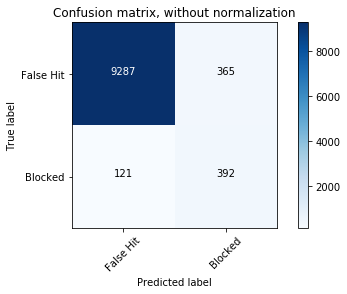

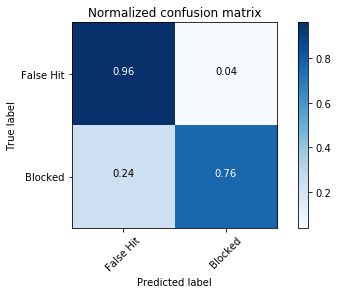

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(train_y_label[20000:],[1 if i>0.05 else 0 for i in ans])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False Hit','Blocked'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False Hit','Blocked'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [64]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')